In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Data/Amazon.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [4]:
Rgn=df['Region'].value_counts().index
Rgn_values=df['Region'].value_counts().values
Rgn


Index(['Sub-Saharan Africa', 'Europe', 'Australia and Oceania', 'Asia',
       'Middle East and North Africa', 'Central America and the Caribbean',
       'North America'],
      dtype='object', name='Region')

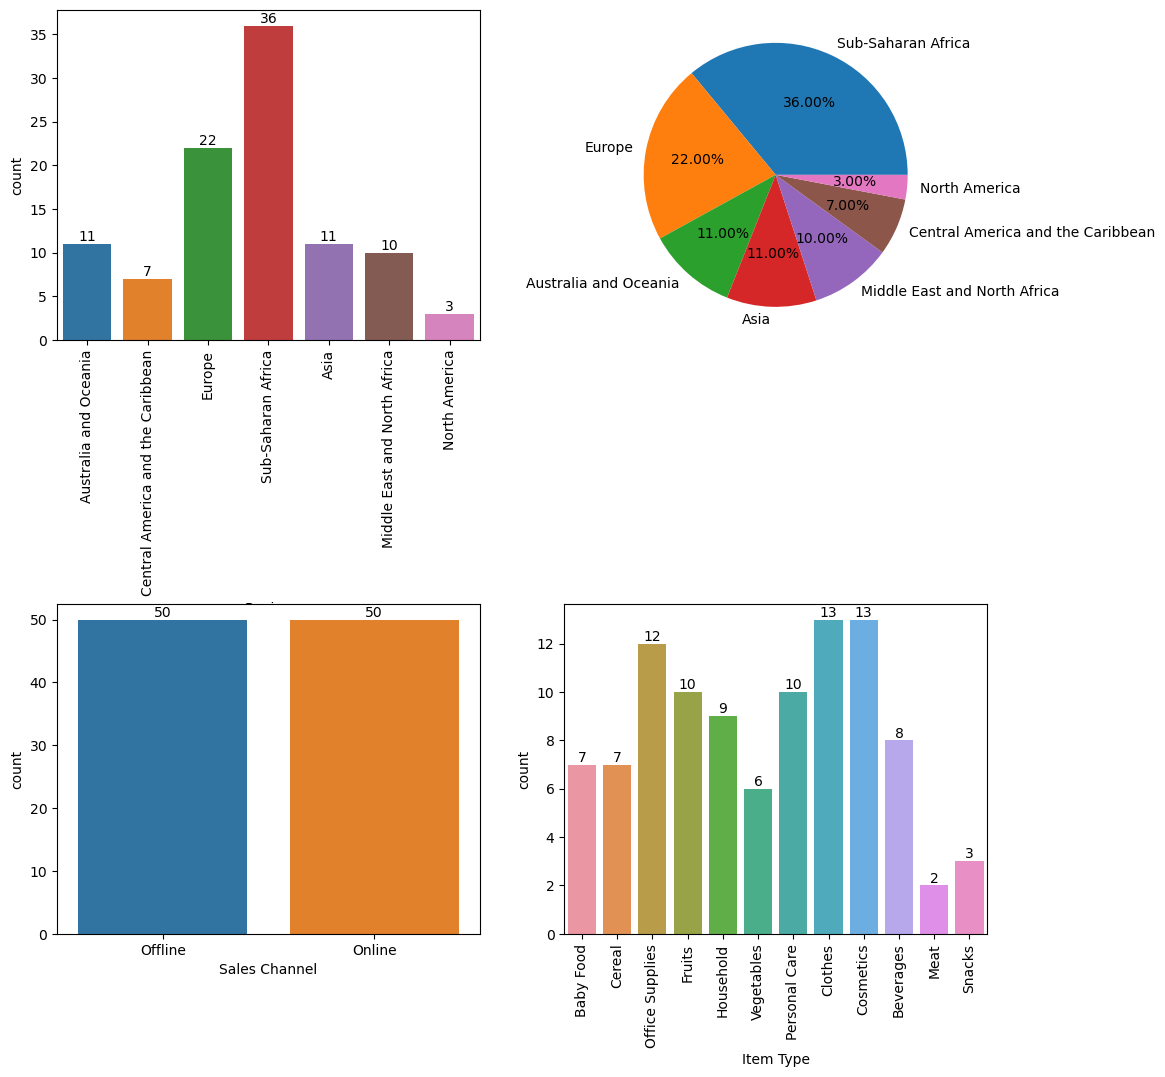

In [7]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12))
sns.countplot(df,x="Region",ax=ax1)
ax1.tick_params(axis='x', rotation=90)
for container in ax1.containers:
    ax1.bar_label(container,color="black")

ax2.pie(x=Rgn_values,labels=Rgn,autopct="%1.2f%%")

sns.countplot(df,x="Sales Channel",ax=ax3)
for container in ax3.containers:
    ax3.bar_label(container,color="black")

sns.countplot(df,x="Item Type",ax=ax4)
ax4.tick_params(axis="x",rotation=90)
for container in ax4.containers:
    ax4.bar_label(container,color="black")

plt.subplots_adjust(hspace=0.8) 
plt.show()


**1).MOST OF THE SALES TOOK PLACE IN SUB-SAHARAN AFRICAN,EUROPEAN REGION NEARLY 36% AND 22% RESPECTIVELY.**

**2).MAJORITY OF THE ITEMS SOLD ARE OF THE TYPE CLOTHES,COSMETICS AND OFFICE SUPPLIES**

**3).THERE IS EQUAL NUMBER IN OFFLINE AS WELL AS ONLINE CHANNEL**

In [6]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [8]:
revenue_by_region = df.groupby('Region').agg({"Total Revenue":"sum",
                                              "Total Profit":"sum"}).reset_index()
revenue_by_region

,Region,Total Revenue,Total Profit
0,Asia,21347091.02,6113845.87
1,Australia and Oceania,14094265.13,4722160.03
2,Central America and the Caribbean,9170385.49,2846907.85
3,Europe,33368932.11,11082938.63
4,Middle East and North Africa,14052706.58,5761191.86
5,North America,5643356.55,1457942.76
6,Sub-Saharan Africa,39672031.43,12183211.40


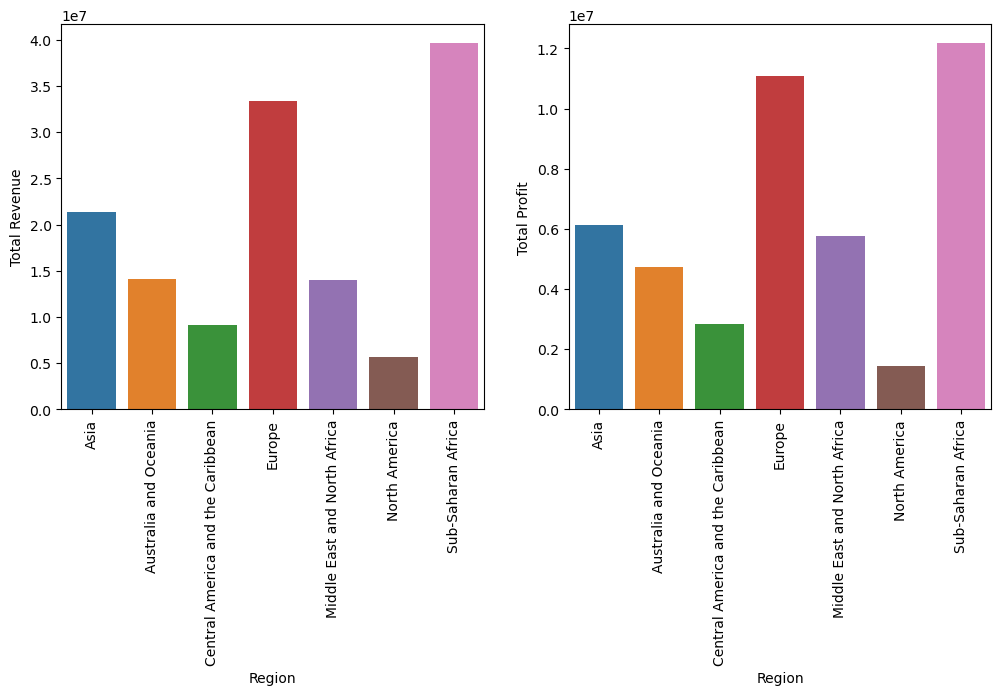

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.barplot(revenue_by_region,x="Region",y="Total Revenue",ax=ax1)
ax1.tick_params(axis="x",rotation=90)
sns.barplot(revenue_by_region,x="Region",y="Total Profit",ax=ax2)
ax2.tick_params(axis="x",rotation=90)


**1.) MOST REVENUE AND PROFIT IS GENERATED FROM THE SUB-SAHARAN AFRICAN REGION.**

In [10]:
revenue_by_item=df.groupby("Item Type").agg({"Total Revenue":"sum","Total Profit":"sum"}).reset_index()
revenue_by_item

,Item Type,Total Revenue,Total Profit
0,Baby Food,10350327.60,3886643.70
1,Beverages,2690794.60,888047.28
2,Cereal,5322898.90,2292443.43
3,Clothes,7787292.80,5233334.40
4,Cosmetics,36601509.60,14556048.66
5,Fruits,466481.34,120495.18
6,Household,29889712.29,7412605.71
7,Meat,4503675.75,610610.00
8,Office Supplies,30585380.07,5929583.75
9,Personal Care,3980904.84,1220622.48


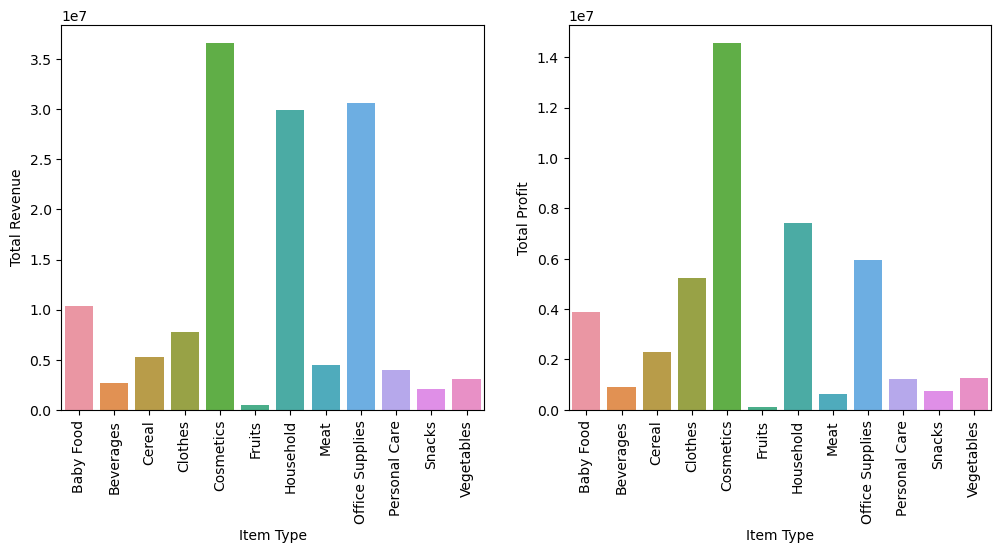

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.barplot(revenue_by_item,x="Item Type",y="Total Revenue",ax=ax1)
ax1.tick_params(axis="x",rotation=90)
sns.barplot(revenue_by_item,x="Item Type",y="Total Profit",ax=ax2)
ax2.tick_params(axis="x",rotation=90)


**MOST OF THE REVENUE AND PROFIT IS GENERATED ON THE ITEMS OF COSMETICS,HOUSEHOLD,OFFICE SUPPLIES.**

In [12]:
revenue_by_sales_channel=df.groupby("Sales Channel").agg({"Total Revenue":"sum","Total Profit":"sum"}).reset_index()
revenue_by_sales_channel

,Sales Channel,Total Revenue,Total Profit
0,Offline,79094809.20,24920726.67
1,Online,58253959.11,19247471.73


<Axes: xlabel='Sales Channel', ylabel='Total Profit'>

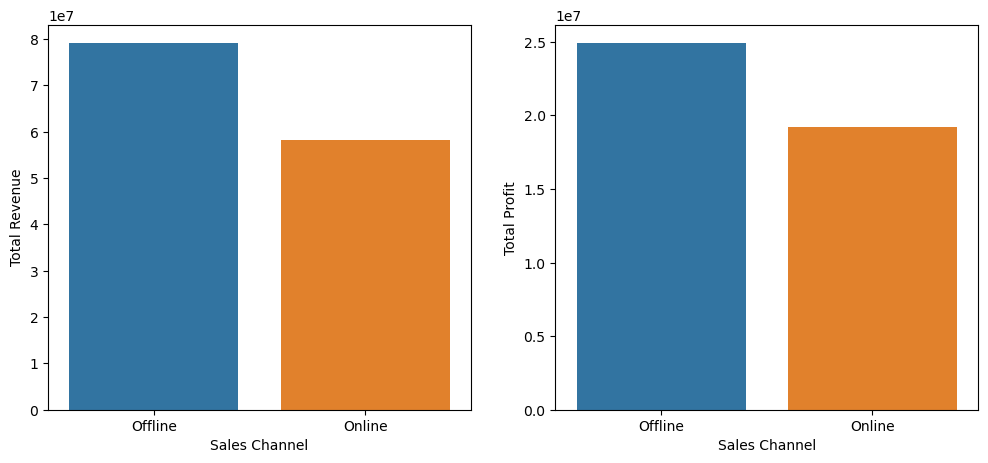

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.barplot(revenue_by_sales_channel,x="Sales Channel",y="Total Revenue",ax=ax1)
sns.barplot(revenue_by_sales_channel,x="Sales Channel",y="Total Profit",ax=ax2)



**MOST OF THE REVENUE AND PROFIT IS GENERATED FROM OFFLINE SALES CHANNEL AS COMPARED TO ONLINE**

In [14]:
df["Profit Margin"]=(df["Total Profit"]/df["Total Revenue"])*100

In [15]:
profit_margin_by_item=df.groupby("Item Type").agg({"Profit Margin":"mean"
}).reset_index()

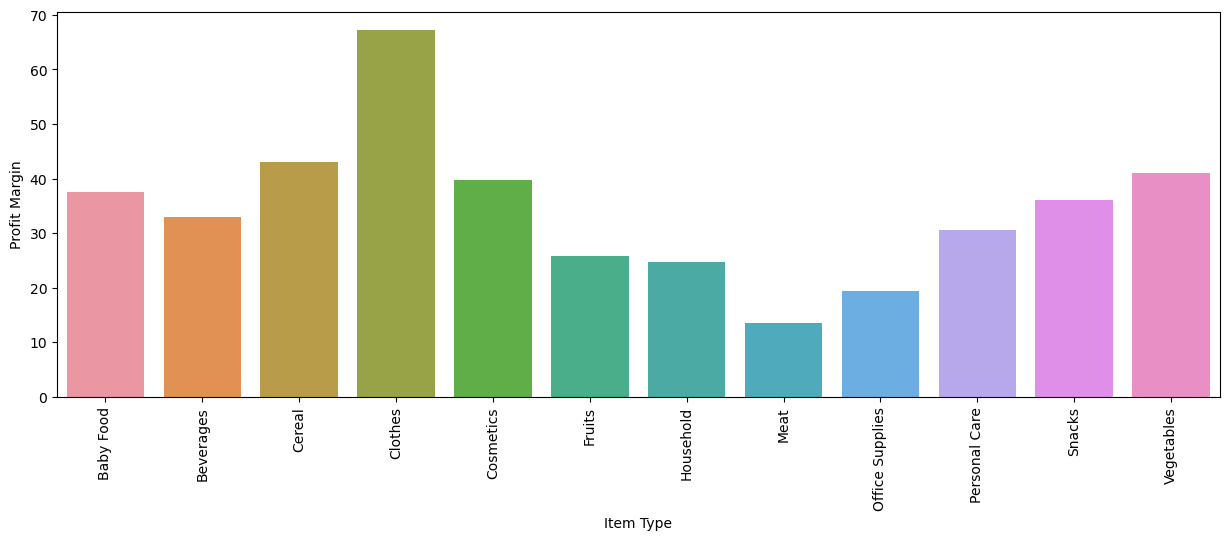

In [16]:
plt.figure(figsize=(15, 5))
sns.barplot(profit_margin_by_item,x="Item Type",y="Profit Margin")
plt.tick_params(axis="x",rotation=90)

**MOST PROFIT MARGIN IS EARNED BY THE SALE OF CLOTHES AND THE PROFIT MARGIN IS OF MEAT.**

In [17]:
df[df["Item Type"]=="Baby Food"][["Sales Channel","Units Sold"]]

,Sales Channel,Units Sold
0,Offline,9925
5,Online,2974
20,Online,7450
21,Online,1273
61,Online,4750
78,Offline,8614
87,Offline,5559


In [18]:
customer_behavior = df.groupby('Item Type').agg({
    "Order ID": "count",  
    "Total Revenue": "sum", 
    "Units Sold": "sum"  
}).reset_index()

In [19]:
customer_behavior["Average Order Value"]=customer_behavior["Total Revenue"]/customer_behavior["Order ID"]

In [20]:
customer_behavior


,Item Type,Order ID,Total Revenue,Units Sold,Average Order Value
0,Baby Food,7,10350327.60,40545,1.478618e+06
1,Beverages,8,2690794.60,56708,3.363493e+05
2,Cereal,7,5322898.90,25877,7.604141e+05
3,Clothes,13,7787292.80,71260,5.990225e+05
4,Cosmetics,13,36601509.60,83718,2.815501e+06
5,Fruits,10,466481.34,49998,4.664813e+04
6,Household,9,29889712.29,44727,3.321079e+06
7,Meat,2,4503675.75,10675,2.251838e+06
8,Office Supplies,12,30585380.07,46967,2.548782e+06
9,Personal Care,10,3980904.84,48708,3.980905e+05


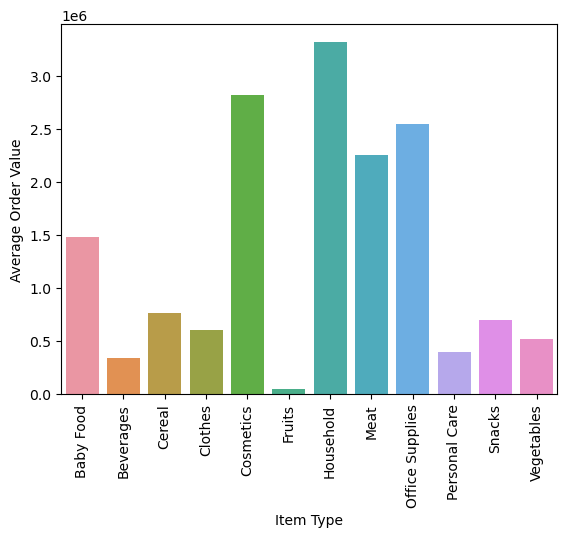

In [21]:
sns.barplot(customer_behavior,x="Item Type",y="Average Order Value")
plt.tick_params(axis="x",rotation=90)

**The Average Order Value (AOV) is highest for household items, followed by cosmetics, office supplies, and meat. Therefore, we should stock up on these items more.**

In [25]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin,Order Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924,May
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574,Aug
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987,May
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,25.830654,Jun
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,19.386987,Feb


In [22]:
import datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [23]:
df["Order Month"]=df["Order Date"].dt.month

In [24]:
df["Order Month"]=df["Order Month"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})

In [26]:
month_counts=df.groupby("Order Month").agg({"Order ID":"count"})
month_counts

,Order ID
Order Month,
Apr,9
Aug,4
Dec,5
Feb,13
Jan,7
Jul,12
Jun,10
Mar,4
May,11


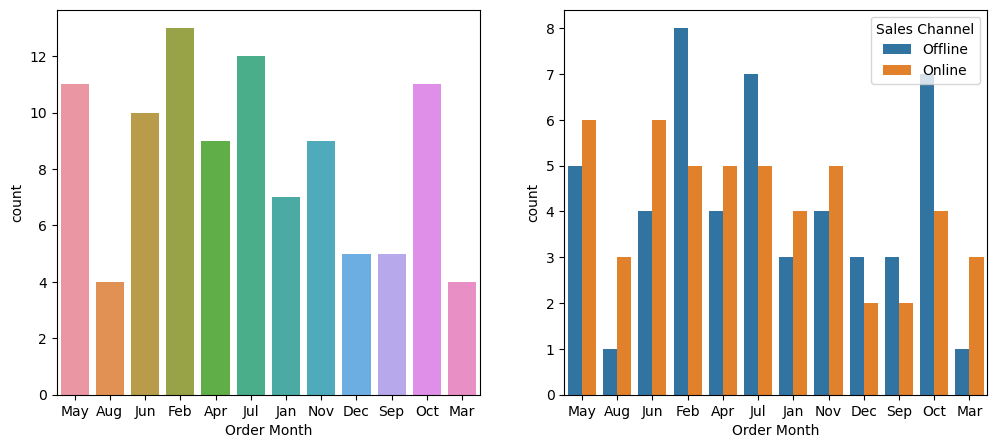

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.countplot(df,x="Order Month",ax=ax1)
sns.countplot(df,x="Order Month",hue="Sales Channel",ax=ax2)
plt.show()

In [28]:
df["Order Year"]=df["Order Date"].dt.year

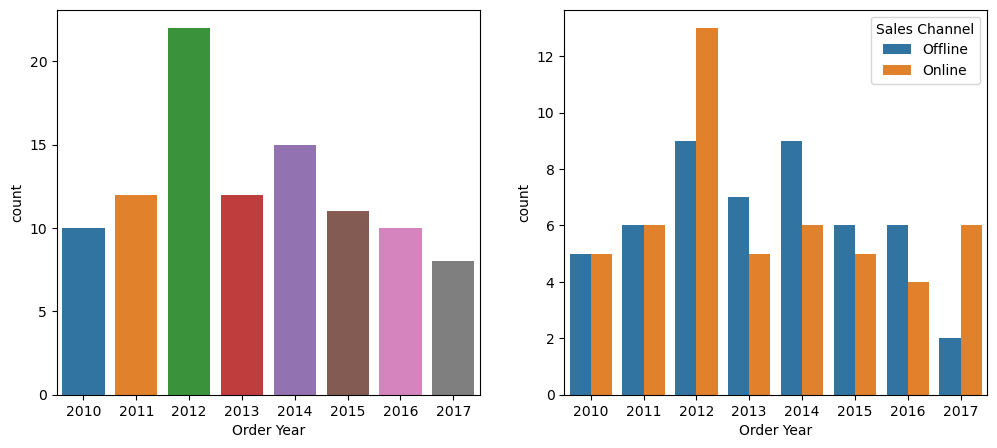

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.countplot(df,x="Order Year",ax=ax1)
sns.countplot(df,x="Order Year",hue="Sales Channel",ax=ax2)
plt.show()

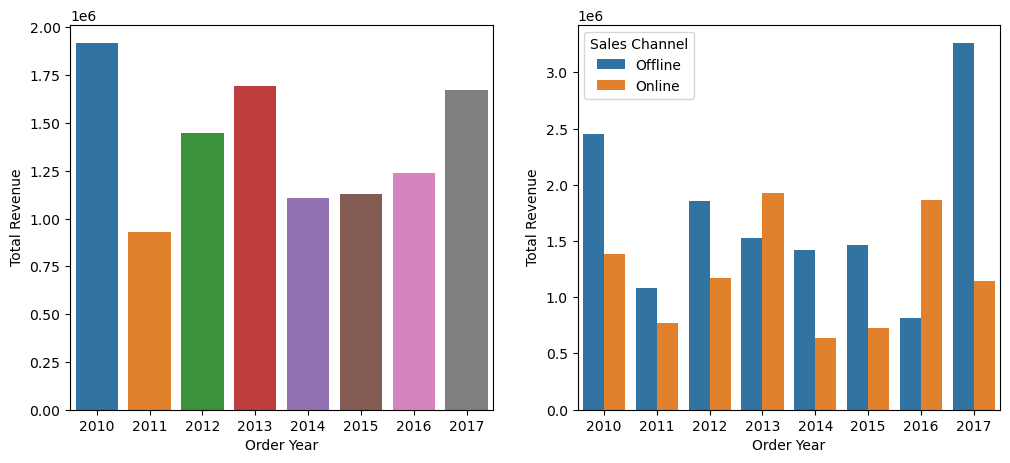

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.barplot(df,x="Order Year",y="Total Revenue",ci=None,ax=ax1)
sns.barplot(df,x="Order Year",y="Total Revenue",hue="Sales Channel",ci=None,ax=ax2)
plt.show()

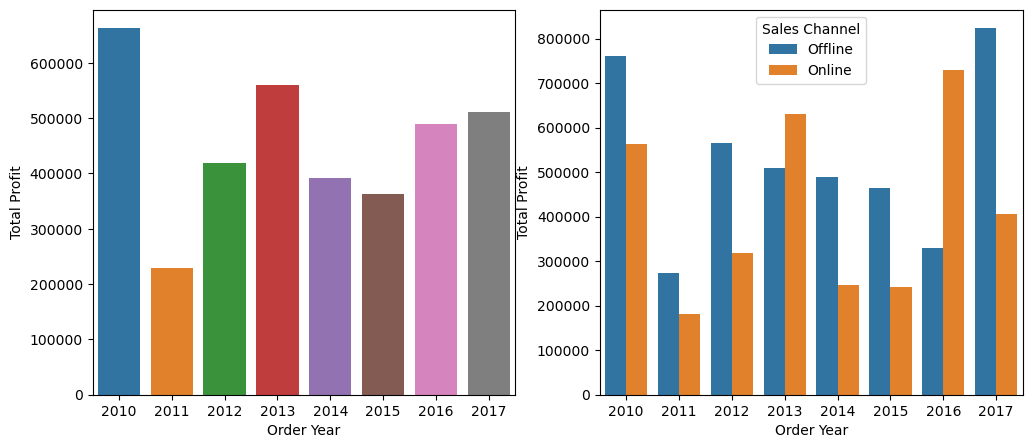

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.barplot(df,x="Order Year",y="Total Profit",ci=None,ax=ax1)
sns.barplot(df,x="Order Year",y="Total Profit",hue="Sales Channel",ci=None,ax=ax2)
plt.show()

In [32]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924,May,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574,Aug,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987,May,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,25.830654,Jun,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,19.386987,Feb,2013


In [33]:
priority = df.groupby("Order Priority").agg({"Total Revenue":"sum","Total Profit":"sum"}).reset_index()
priority

,Order Priority,Total Revenue,Total Profit
0,C,18855063.05,6748328.46
1,H,48749546.05,16891599.58
2,L,36628127.46,10858727.86
3,M,33116031.75,9669542.50


<Axes: xlabel='Order Priority', ylabel='Total Profit'>

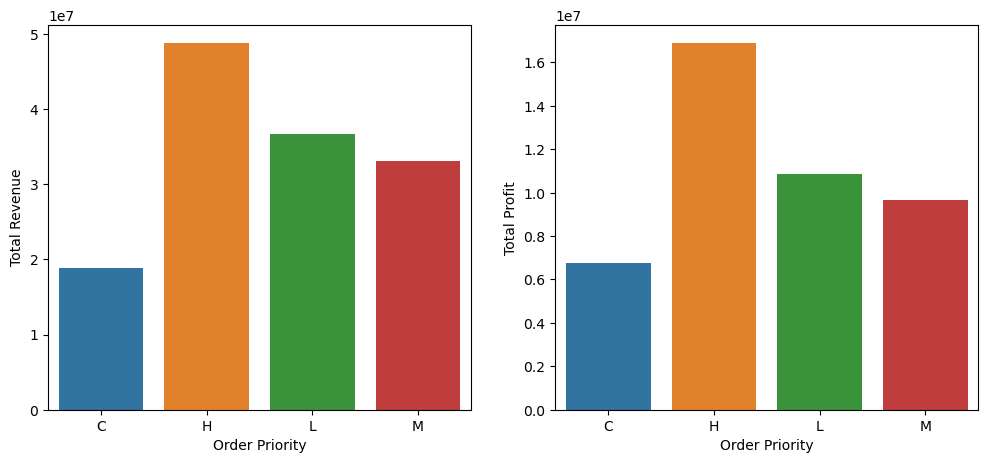

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.barplot(priority,x="Order Priority",y="Total Revenue",ax=ax1)
sns.barplot(priority,x="Order Priority",y="Total Profit",ax=ax2)

In [35]:
priority_counts = df.groupby(['Region', 'Order Priority']).size().unstack(fill_value=0)

priority_percentage = priority_counts.div(priority_counts.sum(axis=1), axis=0) * 100
priority_percentage

Order Priority,C,H,L,M
Region,,,,
Asia,18.181818,27.272727,36.363636,18.181818
Australia and Oceania,36.363636,45.454545,9.090909,9.090909
Central America and the Caribbean,28.571429,28.571429,28.571429,14.285714
Europe,22.727273,31.818182,27.272727,18.181818
Middle East and North Africa,0.000000,20.000000,40.000000,40.000000
North America,33.333333,0.000000,33.333333,33.333333
Sub-Saharan Africa,22.222222,30.555556,25.000000,22.222222


In [36]:
priority_percentage = priority_percentage.reset_index()

priority_percentage_melted = priority_percentage.melt(id_vars='Region', var_name='Order Priority', value_name='Percentage')

priority_percentage_melted

,Region,Order Priority,Percentage
0,Asia,C,18.181818
1,Australia and Oceania,C,36.363636
2,Central America and the Caribbean,C,28.571429
3,Europe,C,22.727273
4,Middle East and North Africa,C,0.000000
5,North America,C,33.333333
6,Sub-Saharan Africa,C,22.222222
7,Asia,H,27.272727
8,Australia and Oceania,H,45.454545
9,Central America and the Caribbean,H,28.571429


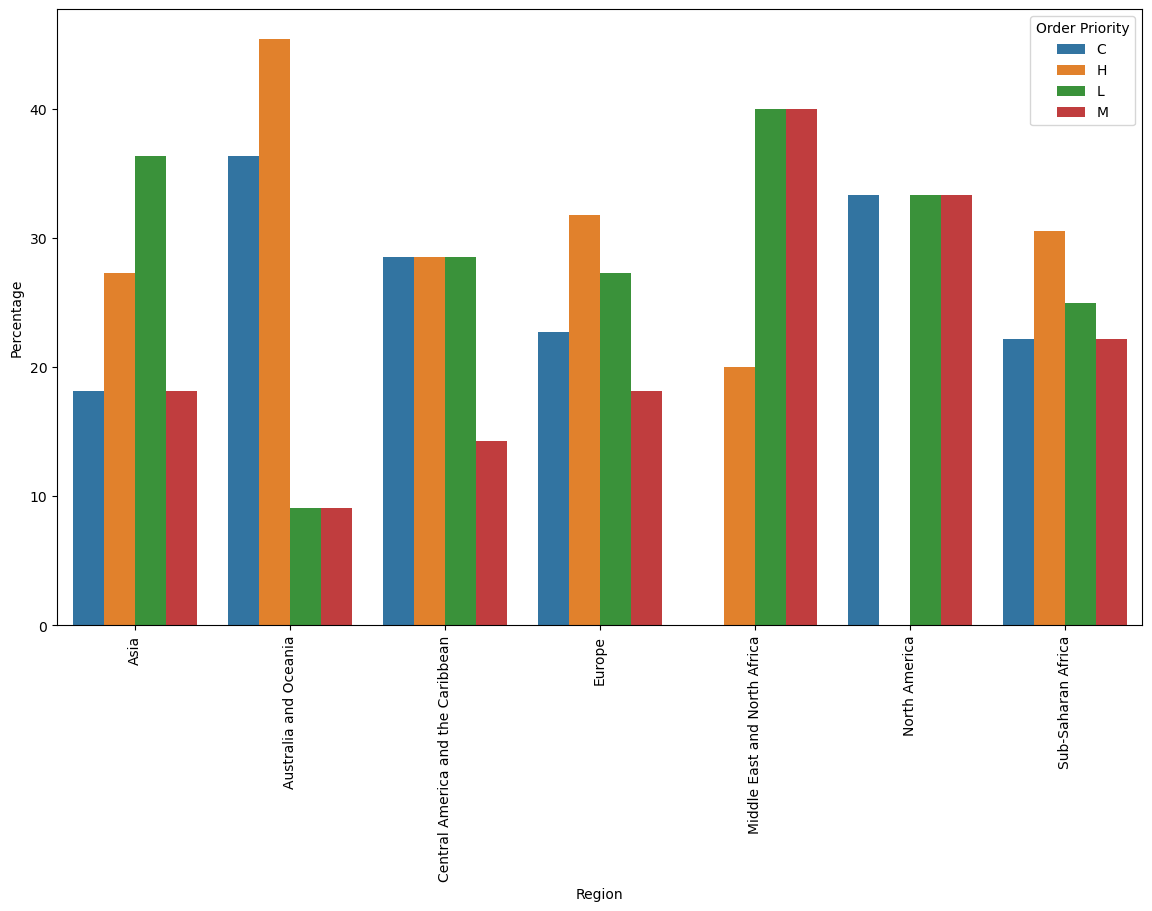

In [37]:
plt.figure(figsize=(14,8))
sns.barplot(data=priority_percentage_melted, x='Region', y='Percentage', hue='Order Priority')
plt.xticks(rotation=90) 
plt.show()

In [38]:
df.to_csv("Updated.csv")